In [2]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [3]:
# Exploratory Data Analysis (EDA)
# Load the training data

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample = pd.read_csv('sample_submission.csv')

In [ ]:
# View train data structure
train.head()

In [ ]:
# View test data structure
test.head()

In [5]:
# Check for missing values, data types, and basic statistics
print(train.info())
print(train.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB
None
          sentiment        tweetid
count  15819.000000   15819.000000
mean       0.917504  501719.433656
std        0.836537  289045.983132
min       -1.000000       6.000000
25%        1.000000  253207.500000
50%        1.000000  502291.000000
75%        1.000000  753769.000000
max        2.000000  999888.000000


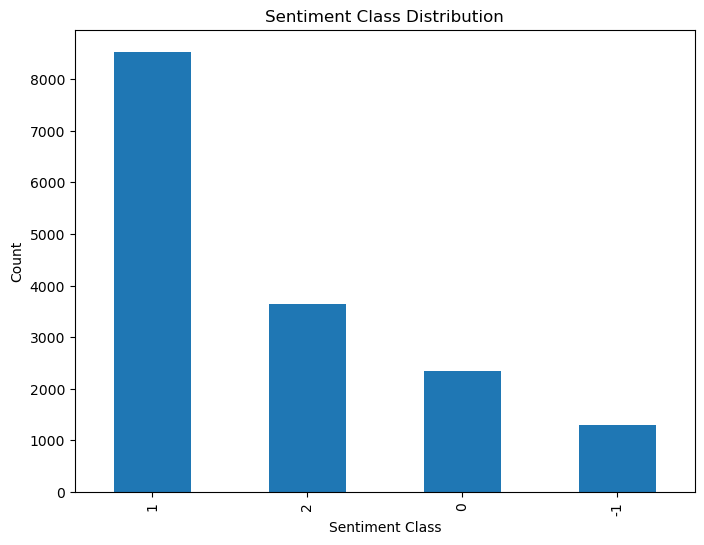

In [6]:
# Visualize the distribution of sentiment classes
plt.figure(figsize=(8, 6))
train['sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Class Distribution')
plt.xlabel('Sentiment Class')
plt.ylabel('Count')
plt.show()

In [10]:
# Split X Variable from Target Variable

y = train['sentiment']
X = train['message']

In [13]:
print(y)

0        1
1        1
2        2
3        1
4        1
        ..
15814    1
15815    2
15816    0
15817   -1
15818    0
Name: sentiment, Length: 15819, dtype: int64


In [14]:
print(X)

0        PolySciMajor EPA chief doesn't think carbon di...
1        It's not like we lack evidence of anthropogeni...
2        RT @RawStory: Researchers say we have three ye...
3        #TodayinMaker# WIRED : 2016 was a pivotal year...
4        RT @SoyNovioDeTodas: It's 2016, and a racist, ...
                               ...                        
15814    RT @ezlusztig: They took down the material on ...
15815    RT @washingtonpost: How climate change could b...
15816    notiven: RT: nytimesworld :What does Trump act...
15817    RT @sara8smiles: Hey liberals the climate chan...
15818    RT @Chet_Cannon: .@kurteichenwald's 'climate c...
Name: message, Length: 15819, dtype: object


In [12]:
#Clean text Data

vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=2, stop_words="english")
X_vectorized = vectorizer.fit_transform(X)

In [15]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, shuffle=True, random_state=42)

In [16]:
# Modeling
# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_f1_scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='f1_macro')

# Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
knn_params = {'n_neighbors': [3, 5, 7]}
knn_grid = GridSearchCV(knn_model, knn_params, cv=5, scoring='f1_macro')
knn_grid.fit(X_train, y_train)
knn_best_model = knn_grid.best_estimator_

# Linear SVM
svm_model = SVC(kernel='linear')
svm_params = {'C': [1, 10, 100]}
svm_grid = GridSearchCV(svm_model, svm_params, cv=5, scoring='f1_macro')
svm_grid.fit(X_train, y_train)
svm_best_model = svm_grid.best_estimator_

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_params = {'max_depth': [3, 5, 7]}
dt_grid = GridSearchCV(dt_model, dt_params, cv=5, scoring='f1_macro')
dt_grid.fit(X_train, y_train)
dt_best_model = dt_grid.best_estimator_

# Random Forest
rf_model = RandomForestClassifier()
rf_params = {'n_estimators': [50, 100, 150]}
rf_grid = GridSearchCV(rf_model, rf_params, cv=5, scoring='f1_macro')
rf_grid.fit(X_train, y_train)
rf_best_model = rf_grid.best_estimator_

C:\Users\stuar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\stuar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [21]:
# Compare F1-scores of Model Results
print("Logistic Regression F1-score: {:.2f}".format(lr_f1_scores.mean()))
print("KNN F1-score: {:.2f}".format(knn_grid.best_score_))
print("Linear SVM F1-score: {:.2f}".format(svm_grid.best_score_))
print("Decision Tree F1-score: {:.2f}".format(dt_grid.best_score_))
print("Random Forest F1-score: {:.2f}".format(rf_grid.best_score_))

Logistic Regression F1-score: 0.59
KNN F1-score: 0.55
Linear SVM F1-score: 0.63
Decision Tree F1-score: 0.40
Random Forest F1-score: 0.55


In [29]:
# Select model with highest f1-score and increase with hyperparameter tuning
# Linear SVM with Grid Search for Hyperparameter Tuning
svm_model = SVC(kernel='linear')
svm_params = {'C': [0.01, 0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]}
svm_grid = GridSearchCV(svm_model, svm_params, cv=10, scoring='f1_macro')
svm_grid.fit(X_train, y_train)
svm_best_model = svm_grid.best_estimator_

In [30]:
# Print the best hyperparameters found
print("Best Hyperparameters for Linear SVM: ", svm_grid.best_params_)

Best Hyperparameters for Linear SVM:  {'C': 1, 'gamma': 1}


In [31]:
# Evaluate the model
predictions = svm_best_model.predict(X_test)
print("Test F1-score after Hyperparameter Tuning: {:.2f}".format(svm_best_model.score(X_test, y_test)))
print(classification_report(y_test, predictions))

Test F1-score after Hyperparameter Tuning: 0.76
              precision    recall  f1-score   support

          -1       0.84      0.43      0.57       278
           0       0.60      0.40      0.48       425
           1       0.76      0.89      0.82      1755
           2       0.79      0.76      0.78       706

    accuracy                           0.76      3164
   macro avg       0.75      0.62      0.66      3164
weighted avg       0.75      0.76      0.74      3164



In [32]:
# Prepare Test set

testx = test['message']
test_vect = vectorizer.transform(testx)

In [33]:
# Make Predictions on the Test set and add sentiment column to original Test data
y_pred = svm_best_model.predict(test_vect)

In [34]:
y_pred

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [35]:
# Add predictions to test data under 'sentiment' column
test['sentiment'] = y_pred

In [36]:
# View predictions
test.head()

,message,tweetid,sentiment
0,Europe will now be looking to China to make su...,169760,1
1,Combine this with the polling of staffers re c...,35326,1
2,"The scary, unimpeachable evidence that climate...",224985,1
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263,1
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928,0


In [37]:
#Create a csv file with 'tweetid' and 'sentiment' columns to submit to kaggle 

test[['tweetid', 'sentiment']].to_csv('stuart_hofmeester.csv', index=False)

In [38]:
kaggle_submission = pd.read_csv('stuart_hofmeester.csv')

In [39]:
# Check to see if submission csv is in correct format
kaggle_submission.head()

,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,1
3,476263,1
4,872928,0
